In [1]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import warnings

warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

In [62]:
train = pd.read_csv('/home/ankit/Downloads/identify_sentiment/train.csv')
test = pd.read_csv('/home/ankit/Downloads/identify_sentiment/test.csv')

In [63]:
def remove_user_handler(input_text, pattern):  
    r = re.findall(pattern, input_text)
    for i in r:
        input_text = re.sub(i, '', input_text)
    
    return input_text

train['tidy_tweet'] = np.vectorize(remove_user_handler)(train['tweet'], '@[\w]*')

In [64]:
train['tidy_tweet'] = np.vectorize(remove_user_handler)(train['tidy_tweet'], 'https?:\/\/[www]?\.?[\w]*\.[\w]*\/?[\w]*\/?[\w]*\/?')
train['tidy_tweet'] = train['tidy_tweet'].str.lower()

In [65]:
train['tidy_tweet'] = train['tidy_tweet'].str.replace("[^a-zA-Z]", " ")

In [66]:
train['tidy_tweet'] = train['tidy_tweet'].apply(lambda x : ' '.join([w for w in x.split() if len(w) > 3]))

In [67]:
tokenized_tweet = train['tidy_tweet'].apply(lambda x : x.split())
print(tokenized_tweet)

0       [fingerprint, pregnancy, test, android, apps, ...
1       [finally, transparant, silicon, case, thanks, ...
2       [love, this, would, talk, makememories, unplug...
3       [wired, know, george, made, that, iphone, cute...
4       [what, amazing, service, apple, even, talk, ab...
5       [iphone, software, update, fucked, phone, time...
6       [happy, instapic, instadaily, sony, xperia, xp...
7       [type, charger, cable, amazon, etsy, year, cro...
8       [bout, shopping, again, listening, music, ipho...
9       [photo, selfie, pool, water, sony, camera, pic...
10      [apple, when, make, ipod, dont, make, color, i...
11      [heavy, machinery, does, what, need, really, d...
12      [contemplating, giving, iphone, bandwagon, sim...
13      [just, made, another, crazy, purchase, theory,...
14      [battery, painful, charge, overnight, lunchtim...
15      [from, deepellum, towards, downtown, dallas, b...
16      [like, share, want, this, phone, case, iphone,...
17      [crazy

In [68]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [lemmatizer.lemmatize(i) for i in x]) # stemming
print(tokenized_tweet)

0       [fingerprint, pregnancy, test, android, apps, ...
1       [finally, transparant, silicon, case, thanks, ...
2       [love, this, would, talk, makememories, unplug...
3       [wired, know, george, made, that, iphone, cute...
4       [what, amazing, service, apple, even, talk, ab...
5       [iphone, software, update, fucked, phone, time...
6       [happy, instapic, instadaily, sony, xperia, xp...
7       [type, charger, cable, amazon, etsy, year, cro...
8       [bout, shopping, again, listening, music, ipho...
9       [photo, selfie, pool, water, sony, camera, pic...
10      [apple, when, make, ipod, dont, make, color, i...
11      [heavy, machinery, doe, what, need, really, dr...
12      [contemplating, giving, iphone, bandwagon, sim...
13      [just, made, another, crazy, purchase, theory,...
14      [battery, painful, charge, overnight, lunchtim...
15      [from, deepellum, towards, downtown, dallas, b...
16      [like, share, want, this, phone, case, iphone,...
17      [crazy

In [69]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
train['tidy_tweet'] = tokenized_tweet
train

,id,label,tweet,tidy_tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...,fingerprint pregnancy test android apps beauti...
1,2,0,Finally a transparant silicon case ^^ Thanks t...,finally transparant silicon case thanks uncle ...
2,3,0,We love this! Would you go? #talk #makememorie...,love this would talk makememories unplug relax...
3,4,0,I'm wired I know I'm George I was made that wa...,wired know george made that iphone cute davent...
4,5,1,What amazing service! Apple won't even talk to...,what amazing service apple even talk about que...
5,6,1,iPhone software update fucked up my phone big ...,iphone software update fucked phone time stupi...
6,7,0,Happy for us .. #instapic #instadaily #us #son...,happy instapic instadaily sony xperia xperiaz
7,8,0,New Type C charger cable #UK http://www.ebay.c...,type charger cable amazon etsy year cross toby...
8,9,0,Bout to go shopping again listening to music #...,bout shopping again listening music iphone jus...
9,10,0,Photo: #fun #selfie #pool #water #sony #camera...,photo selfie pool water sony camera picoftheda...


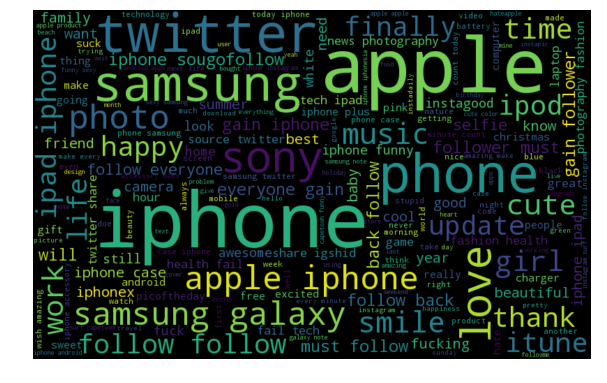

In [70]:
all_words = ' '.join([text for text in train['tidy_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

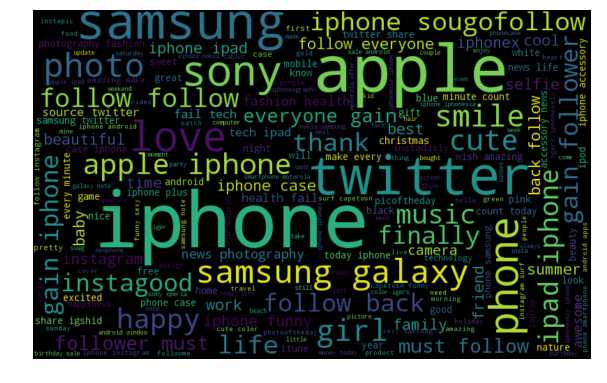

In [71]:
normal_words =' '.join([text for text in train['tidy_tweet'][train['label'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

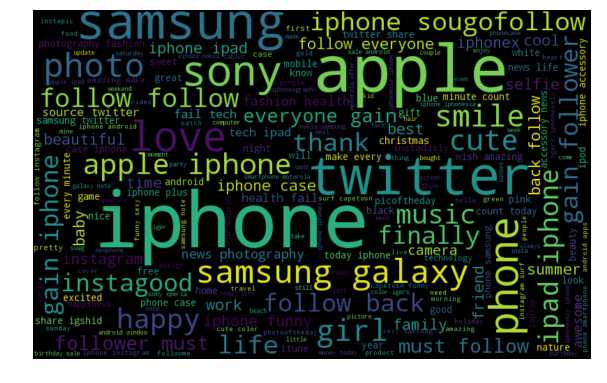

In [72]:
negative_words =' '.join([text for text in train['tidy_tweet'][train['label'] == 1]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [75]:
# function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

HT_regular = hashtag_extract(train['tidy_tweet'][train['label'] == 0])

# extracting hashtags from racist/sexist tweets
HT_negative = hashtag_extract(train['tidy_tweet'][train['label'] == 1])

# unnesting list
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

ValueError: min() arg is an empty sequence

<Figure size 1152x360 with 0 Axes>

In [ ]:
b = nltk.FreqDist(HT_negative)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})
# selecting top 10 most frequent hashtags
e = e.nlargest(columns="Count", n = 10)   
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer as cv
bow_vectorizer = cv(max_df=0.90, min_df=2, max_features=1000)
bow = bow_vectorizer.fit_transform(train['tidy_tweet']).toarray()
print(bow)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, ngram_range = (1, 2))
# TF-IDF feature matrix
tfidf = tfidf_vectorizer.fit_transform(train['tidy_tweet']).toarray()
print(tfidf)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

xtrain, xval, ytrain, yval = train_test_split(bow, train['label'], test_size = 0.3, random_state=25)

lreg = LogisticRegression()
lreg.fit(xtrain, ytrain)

prediction = lreg.predict_proba(xval)

prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int = prediction_int.astype(np.int)

f1_score(yval, prediction_int) # calculating f1 score

In [ ]:
xtrain, xval, ytrain, yval = train_test_split(tfidf, train['label'], test_size = 0.3, random_state=25)

lreg = LogisticRegression()
lreg.fit(xtrain, ytrain)

prediction = lreg.predict_proba(xval)

prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int = prediction_int.astype(np.int)

f1_score(yval, prediction_int) # calculating f1 score

In [ ]:
from sklearn.naive_bayes import MultinomialNB

xtrain, xval, ytrain, yval = train_test_split(bow, train['label'], test_size = 0.3, random_state=25)
gnb = MultinomialNB()
gnb.fit(xtrain, ytrain)

prediction = gnb.predict_proba(xval)


prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int = prediction_int.astype(np.int)

f1_score(yval, prediction_int) # calculating f1 score

In [ ]:
xtrain, xval, ytrain, yval = train_test_split(tfidf, train['label'], test_size = 0.3, random_state=25)
gnb = MultinomialNB()
gnb.fit(xtrain, ytrain)

prediction = gnb.predict_proba(xval)


prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int = prediction_int.astype(np.int)

f1_score(yval, prediction_int) # calculating f1 score

In [ ]:
xtrain, xval, ytrain, yval = train_test_split(bow, train['label'], test_size = 0.3, random_state=25)

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 100)
rfc.fit(xtrain, ytrain)

prediction = rfc.predict_proba(xval)


prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int = prediction_int.astype(np.int)

f1_score(yval, prediction_int) # calculating f1 score

In [ ]:
xtrain, xval, ytrain, yval = train_test_split(tfidf, train['label'], test_size = 0.3, random_state=25)

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 100)
rfc.fit(xtrain, ytrain)

prediction = rfc.predict_proba(xval)


prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int = prediction_int.astype(np.int)

f1_score(yval, prediction_int) # calculating f1 score

In [ ]:
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
train['tokenized_tweet'] = train['tidy_tweet'].apply(word_tokenize)
tweet = train['tokenized_tweet'].tolist()
#for x in range(len(tweet)):
#    tweet = tweet.split()
tweet

In [78]:
from gensim.models import Word2Vec
model = Word2Vec(tweet, min_count=1,size= 50,workers=3, window =3, sg = 1)
words = list(model.wv.vocab)
model[model.wv.vocab]

array([[-0.00615535,  0.01849031,  0.02723337, ...,  0.05235762,
        -0.02022702,  0.00378328],
       [-0.06298115,  0.07868542,  0.08895137, ...,  0.16595386,
        -0.01649386,  0.01538821],
       [-0.00682908,  0.02498602,  0.04456131, ...,  0.05573714,
        -0.01700218,  0.00934468],
       ...,
       [-0.00429778,  0.01098153,  0.03370554, ...,  0.0568107 ,
        -0.02424374,  0.00527705],
       [-0.03234225,  0.05213786,  0.06126628, ...,  0.1140616 ,
        -0.01406578,  0.02647737],
       [-0.04383469,  0.06695669,  0.07163899, ...,  0.12385962,
        -0.03162255,  0.01812043]], dtype=float32)

In [79]:
xtrain, xval, ytrain, yval = train_test_split(model[model.wv.vocab], train['label'], test_size = 0.3, random_state=25)

lreg = LogisticRegression()
lreg.fit(xtrain, ytrain)

prediction = lreg.predict_proba(xval)

prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int = prediction_int.astype(np.int)

f1_score(yval, prediction_int) # calculating f1 score

ValueError: Found input variables with inconsistent numbers of samples: [16314, 7920]